#  Drawing a cube
## Computer Vision & Pattern Recognition 2020  ( Professor G. Boracchi)
## Lab. Session 1
------------
### Pietro Verzelli


In [1]:
import time
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
#%matplotlib inline

In [10]:
def tellme(s):
    print(s)
    plt.title(s, fontsize=16)
    plt.draw()
    
    
def select_points(img, N_points):
    tellme('Click to begin')
    plt.imshow(img)

    plt.waitforbuttonpress()
    pts = []
    while True:

        while len(pts) < N_points:
            tellme('Select {} points'.format(N_points))
            pts = np.asarray(plt.ginput(N_points, timeout=-1))
            if len(pts) < N_points:
                tellme('Too few points, starting over')
                time.sleep(1)  # Wait a second
                
        tellme('Key click to confirm')

        if plt.waitforbuttonpress():
            break
            
    return pts
    
def draw_line(point1,point2, options = 'b'):
    
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    
    plt.plot(x_values, y_values, options)

### A simple geometrical construction with 2D homogeneous coordinates
-------

Our goal is to complete the drawing of a cuboid. We use need __six__ vertices on the contour of the cuboid.

In [9]:
img = plt.imread("bluecube.jpg")
pts = select_points(img, 6)
print(pts)

Click to begin
Select 6 points
Happy? Key click for yes, mouse click for no
[[ 549.54469181 1165.07513414]
 [ 234.82880463  679.75010813]
 [1031.556919    946.43041252]
 [ 301.08478088  313.68583936]
 [1248.54524121  600.24293663]
 [ 870.8861766   101.66671537]]


In [11]:
a = np.array([pts[0,0],pts[0,1],1.])
b = np.array([pts[1,0],pts[1,1],1.])
c = np.array([pts[2,0],pts[2,1],1.])
# d = 
# e =
f = np.array([pts[3,0],pts[3,1],1.])
g = np.array([pts[4,0],pts[4,1],1.])
h = np.array([pts[5,0],pts[5,1],1.])

Check if you did it right!

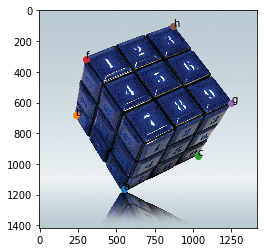

In [24]:
%matplotlib inline



plt.imshow(img)
plt.scatter(a[0],a[1])
plt.annotate('a',(a[:2]) )
plt.scatter(b[0],b[1])
plt.annotate('b', b[:2])
plt.scatter(c[0],c[1])
plt.annotate('c', c[:2])

plt.scatter(f[0],f[1])
plt.annotate('f', f[:2])
plt.scatter(g[0],g[1])
plt.annotate('g', g[:2])
plt.scatter(h[0],h[1])
plt.annotate('h', h[:2])

plt.show()

### Finding and plotting vanishing points
--------

`lAB= cross(A,B)` where `A` and `B` are points computes the line `lAB` passing through `AB` (the 3 coefficient vector).

`D = cross(lAB, lGH)`, where `lAB` and `lGH` are the 1x3 coefficient vectors yield the intersection of the two lines.

_Remark_ :  to determine wether a point `A` belongs to a line `l` it's enough to check whether the scalar product between `A` and `l` is zero, i.e., `A.dot(l) == 0`.

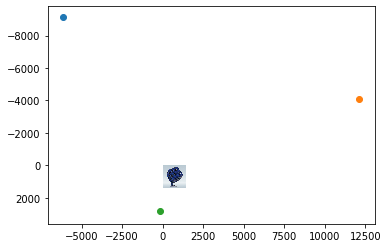

In [25]:
from numpy import cross

vab=cross(cross(a,b),cross(h,g));
vac=cross(cross(a,c),cross(f,h));
vae=cross(cross(b,f),cross(c,g));

# points have to be normalized before visualizing them on the plane
vab=vab/vab[2];
vac=vac/vac[2];
vae=vae/vae[2];

# these are quite far from the image region
plt.imshow(img)
plt.scatter(vab[0],vab[1]);
plt.scatter(vac[0],vac[1]);
plt.scatter(vae[0],vae[1]);
plt.show()

### Finding the missing points (d and e)

In [27]:
d=cross(cross(b,vac),cross(c,vab))
d=d/d[2]
e=cross(cross(g,vac),cross(f,vab))
e=e/e[2]

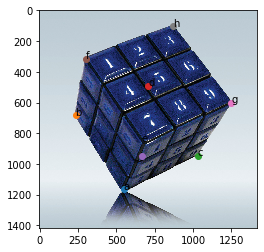

In [29]:



plt.imshow(img)

plt.scatter(a[0],a[1])
plt.annotate('a',(a[:2]) )
plt.scatter(b[0],b[1])
plt.annotate('b', b[:2])
plt.scatter(c[0],c[1])
plt.annotate('c', c[:2])

plt.scatter(d[0],d[1])
plt.annotate('d', d[:2])

plt.scatter(e[0],c[1])
plt.annotate('e', e[:2])


plt.scatter(f[0],f[1])
plt.annotate('f', f[:2])
plt.scatter(g[0],g[1])
plt.annotate('g', g[:2])
plt.scatter(h[0],h[1])
plt.annotate('h', h[:2])

plt.show()

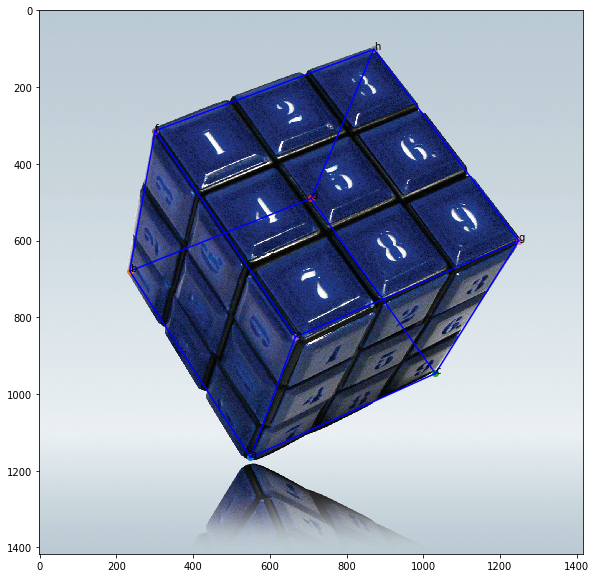

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(img)

plt.scatter(a[0],a[1])
plt.annotate('a',(a[:2]) )
plt.scatter(b[0],b[1])
plt.annotate('b', b[:2])
plt.scatter(c[0],c[1])
plt.annotate('c', c[:2])

plt.scatter(d[0],d[1])
plt.annotate('d', d[:2])

plt.scatter(e[0],e[1])
plt.annotate('e', e[:2])


plt.scatter(f[0],f[1])
plt.annotate('f', f[:2])
plt.scatter(g[0],g[1])
plt.annotate('g', g[:2])
plt.scatter(h[0],h[1])
plt.annotate('h', h[:2])

draw_line(a,b)
draw_line(b,d)
draw_line(a,c)
draw_line(d,c)
draw_line(a,e)
draw_line(b,f)
draw_line(d,h)
draw_line(c,g)
draw_line(e,f)
draw_line(f,h)
draw_line(h,g)
draw_line(g,e)

plt.show()

In [46]:
function drawLine(l, Img)

bottomRow = [0, 1, -size(I, 1)];
topRow = [0, 1, -1];

intTop = cross(l, topRow);
intTop = intTop / intTop(3);

intBottom = cross(l, bottomRow);
intBottom = intBottom / intBottom(3);

plot([intTop(1), intBottom(1)], [intTop(2), intBottom(2)], 'b')

SyntaxError: invalid syntax (<ipython-input-46-8439ea7c25bf>, line 1)

In [47]:
def drawLine(l,I):
    topRow = cross(np.array([0,0,1]), np.array[0,0, I.shape(0)])
    bottomRow = cross(np.array)
    
    intTop = cross(l,topRow)
    intTop /= intTop[2]
    intBottom = cross(l,bottomRow)
    intBottom /= intBottom[2]
    
    draw_line(intBottom, intTop, 'r')

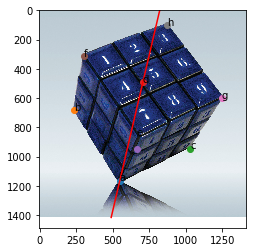

In [50]:
plt.imshow(img)

plt.scatter(a[0],a[1])
plt.annotate('a',(a[:2]) )
plt.scatter(b[0],b[1])
plt.annotate('b', b[:2])
plt.scatter(c[0],c[1])
plt.annotate('c', c[:2])

plt.scatter(d[0],d[1])
plt.annotate('d', d[:2])

plt.scatter(e[0],c[1])
plt.annotate('e', e[:2])


plt.scatter(f[0],f[1])
plt.annotate('f', f[:2])
plt.scatter(g[0],g[1])
plt.annotate('g', g[:2])
plt.scatter(h[0],h[1])
plt.annotate('h', h[:2])


lab = cross(a,d)
drawLine(lab, img)

plt.show()

In [49]:
img.shape

(1417, 1417, 3)